# Reinforcement Learning
## Graded Assessment: Racetrack

In this assignment, you will compare the performance of three reinforcement learning algorithms - *On-Policy First-Visit Monte-Carlo Control*, *Sarsa*, and *Q-Learning* - in a simple racetrack environment. You will then implement a modified TD agent that improves upon the learning performance of a basic Q-Learning agent.

**Total number of marks:** 30 Marks

**Contribution to Unit Grade:** 40%

**What to submit:** Your completed Jupyter notebook (.ipynb file) which should include **all** of your source code. Please **do not change the file name or compress/zip your submission**.

**Where to submit:** Submission Page on Enagage.

This coursework will be marked **anonymously**. Please do not include any identifying information on the files you submit.

You are required to **work individually** on this coursework. You are welcome to discuss ideas with others but you must design your own implementation and **write your own code and answers**. If you do include any any third-party code or text in your submission, please **reference it appropriately**.

**Do not plagiarise**. Plagiarism is a serious academic offence. Both your code and written answers will be automatically checked for possible instances of plagiarism. For details on what plagiarism is and how to avoid it, please visit the following webpage: http://www.bath.ac.uk/library/help/infoguides/plagiarism.html

If you are asked to use specific variable names, data-types, function signatures and notebook cells, please **ensure that you follow these instructions**. Not doing so will cause the our marking software to reject your work, and will assign you a score of zero for that exercise. Please **do not delete or duplicate existing cells**: if you need additional cells, please insert new ones. **If our marking software rejects your work because you have not followed our instructions, you may not get any credit for your work**.

For this coursework, you may use the [Python standard library](https://docs.python.org/3/library/), numpy, and matplotlib. You should also use the `racetrack_env.py` file, which we have provided for you. Please **do not use any other non-standard, third-party libraries**. **If we are unable to run your code because you have used unsupported external libraries, you may not get any credit for your work.**

Please **ensure that your code is readable**. If we cannot tell what your code is doing when marking, you may not get full credit for your work.

Please remember to **save and backup your work regularly**.

Please be sure to **restart the kernel and run your code from start-to-finish** (Kernel → Restart & Run All) before submitting your notebook. Otherwise, you may not be aware that you are using variables in memory that you have deleted.

**Your total runtime must be less than 10 minutes** on the University's lab computers. If your submission exceeds this, it will be automatically interrupted, and you may not get full credit for your work.

Please **adhere to written answer length limits**. When marking, we will not read beyond the specified maximum word counts, and you may not get any credit for anything written beyond them.

## The Racetrack Environment
We have implemented a custom environment called "Racetrack" for you to use during this piece of coursework. It is inspired by the environment described in the course textbook (Reinforcement Learning, Sutton & Barto, 2018, Exercise 5.12), but is not exactly the same.

### Environment Description
Consider driving a race car around a turn on a racetrack. In order to complete the race as quickly as possible, you would want to drive as fast as you can but, to avoid running off the track, you must slow down while turning.

In our simplified racetrack environment, the agent is at one of a discrete set of grid positions. The agent also has a discrete speed in two directions, $x$ and $y$. So the state is represented as follows:
$$(\text{position}_y, \text{position}_x, \text{velocity}_y, \text{velocity}_x)$$

The agent collects a reward of -1 at each time step, an additional -10 for leaving the track (i.e., ending up on a black grid square in the figure below), and an additional +10 for reaching the finish line (any of the red grid squares). The agent starts each episode on a randomly selected grid-square on the starting line (green grid squares) with a speed of zero in both directions. At each time step, the agent can change its speed in both directions. Each speed can be changed by +1, -1 or 0, giving a total of nine actions. For example, the agent may increase its speed in the $x$ direction by -1 and its speed in the $y$ direction by +1. The agent's speed cannot be greater than +10 or less than -10 in either direction.

<img src="images/track_big.png" style="width: 600px;"/>


The agent's next state is determined by its current grid square, its current speed in two directions, and the changes it  makes to its speed in the two directions. This environment is stochastic. When the agent tries to change its speed, no change occurs (in either direction) with probability 0.2. In other words, 20% of the time, the agent's action is ignored and the car's speed remains the same in both directions.

If the agent leaves the track, it is returned to a random start grid-square and has its speed set to zero in both directions; the episode continues. An episode ends only when the agent transitions to a goal grid-square.



### Environment Implementation
We have implemented the above environment in the `racetrack_env.py` file, for you to use in this coursework. Please use this implementation instead of writing your own, and please do not modify the environment.

We provide a `RacetrackEnv` class for your agents to interact with. The class has the following methods:
- **`reset()`** - this method initialises the environment, chooses a random starting state, and returns it. This method should be called before the start of every episode.
- **`step(action)`** - this method takes an integer action (more on this later), and executes one time-step in the environment. It returns a tuple containing the next state, the reward collected, and whether the next state is a terminal state.
- **`render(sleep_time)`** - this method renders a matplotlib graph representing the environment. It takes an optional float parameter giving the number of seconds to display each time-step. This method is useful for testing and debugging, but should not be used during training since it is *very* slow. **Do not use this method in your final submission**.
- **`get_actions()`** - a simple method that returns the available actions in the current state. Always returns a list containing integers in the range [0-8] (more on this later).

In our code, states are represented as Python tuples - specifically a tuple of four integers. For example, if the agent is in a grid square with coordinates ($Y = 2$, $X = 3$), and is moving zero cells vertically and one cell horizontally per time-step, the state is represented as `(2, 3, 0, 1)`. Tuples of this kind will be returned by the `reset()` and `step(action)` methods. It is worth noting that tuples can be used to index certain Python data-structures, such as dictionaries.

There are nine actions available to the agent in each state, as described above. However, to simplify your code, we have represented each of the nine actions as an integer in the range [0-8]. The table below shows the index of each action, along with the corresponding changes it will cause to the agent's speed in each direction.

<img src="images/action_grid.png" style="width: 250px;"/>

For example, taking action 8 will increase the agent's speed in the $x$ direction, but decrease its speed in the $y$ direction.

### Racetrack Code Example
Below, we go through a quick example of using the `RaceTrackEnv` class.

First, we import the class, then create a `RaceTrackEnv` object called `env`. We then initialise the environment using the `reset()` method, and take a look at the initial state variable and the result of `plot()`.


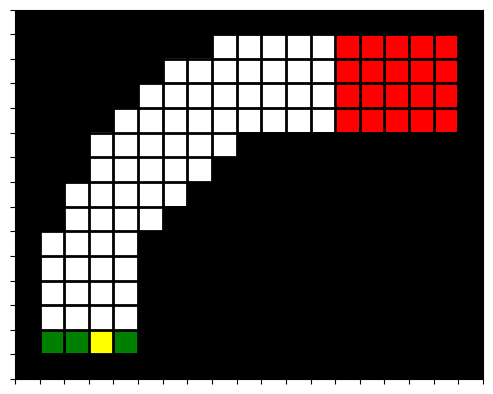

Initial State: (1, 3, 0, 0)


In [1]:
%matplotlib inline

# Set random seed to make example reproducable.
import numpy as np
import random
seed = 5
random.seed(seed)
np.random.seed(seed)

from racetrack_env import RacetrackEnv

# Instantiate environment object.
env = RacetrackEnv()

# Initialise/reset environment.
state = env.reset()
env.render()
print("Initial State: {}".format(state))

As you can see, `reset()` has returned a valid initial state as a four-tuple. The function `plot()` uses the same colour-scheme as described above, but also includes a yellow grid-square to indicate the current position of the agent.

Let's make the agent go upward by using `step(1)`, then inspect the result (recall that action `1` increments the agent's vertical speed while leaving the agent's horizontal speed unchanged).

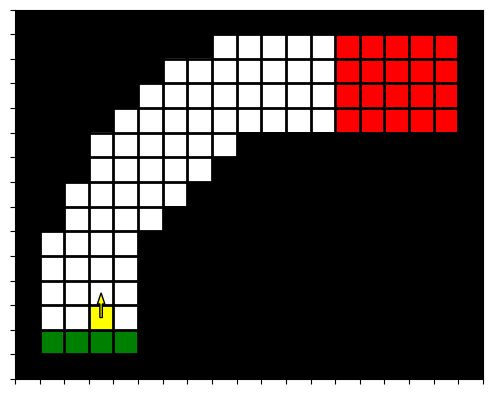

Next State: (2, 3, 1, 0), Reward: -1, Terminal: False


In [2]:
# Let us increase the agent's vertical speed (action 1).
next_state, reward, terminal = env.step(1)
env.render()
print("Next State: {}, Reward: {}, Terminal: {}".format(next_state, reward, terminal))

You can see that the agent has moved one square upwards, and now has a positive vertical speed (indicated by the yellow arrow). Let's set up a loop to see what happens if we take the action a few more times, causing it to repeatedly leave the track.

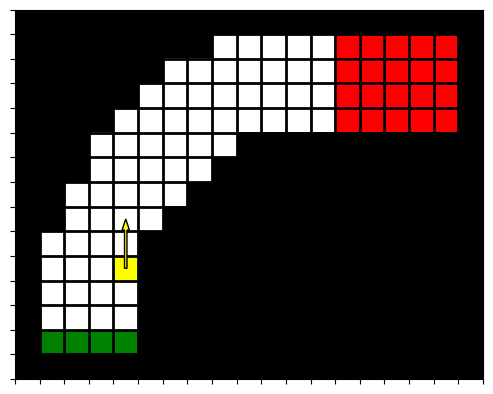

In [3]:
num_steps = 50
for t in range(num_steps) :
    next_state, reward, terminal = env.step(1)
    env.render()

## Exercise 1: Comparing Fundamental RL Algorithms (12 Marks)

Below, we have plotted learning curves showing the performance of On-Policy Monte Carlo Control, Sarsa, and Q-Learning in the Racetrack environment.
We have included an unaltered version of the learning curve, as well as a cropped version to make it easier to compare agents' performance towards the end of training.

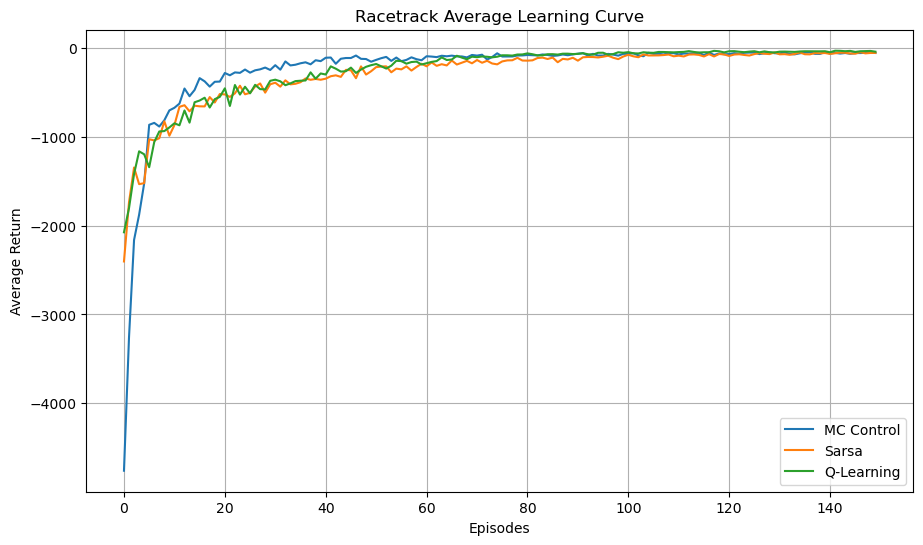

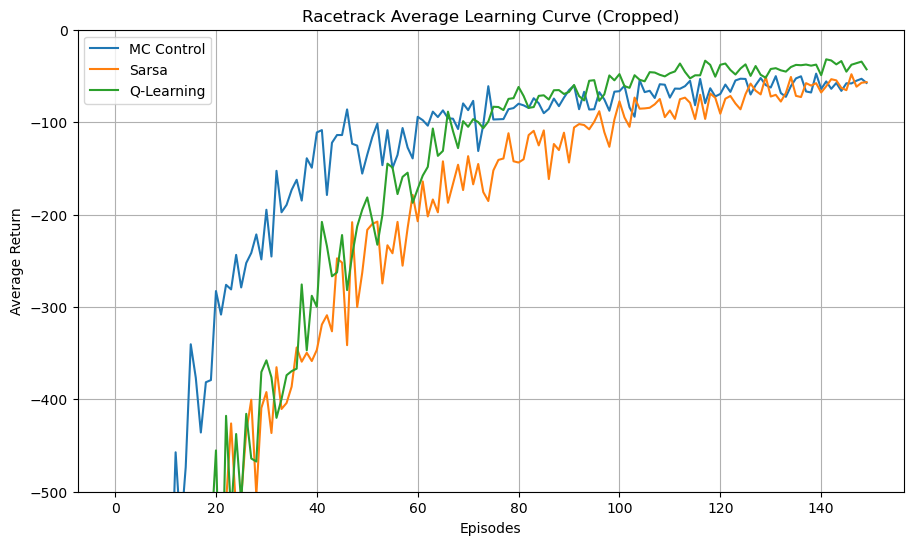

In [4]:
from racetrack_env import plot_combined_results

# Plotting Combined Learning Curve.
%matplotlib inline
plot_combined_results()

Based on these results, and your understanding of the three algorithms used to produce them, please answer the following discussion questions. <br />

**Question 1:** Briefly compare the performance of each of the three agents.

**Question 2:** Why do you think that your Monte Carlo and Temporal-Difference agents behaved differently?

**Question 3:** Does the performance of your Sarsa and Q-Learning agents meet your expectations? Why do you think that this is the case?

**Question 4:** What could be done to improve the performance of these agents?

Please do not exceed **60 words** for any of your answers.

Please write your answers for Exercise 1 in this markdown cell.

**Answer 1:**
MC Control: Converges slowly and stably due to full episode updates, reducing variance. Stabilizes and shows less improvement in later stages. Q-Learning: Initially shows more variance but converges rapidly. Its off-policy updates allow it to surpass MC Control in later stages by continuously refining policy. Sarsa: Slowest convergence with fluctuations due to on-policy updates, leading to cautious and consistent learning.


**Answer 2:**
Monte Carlo updates values after complete episodes, resulting in stable but slower policy refinement. Temporal-Difference methods (Sarsa, Q-Learning) update after each step, leading to faster but more variable learning due to incremental updates. This causes MC to stabilize early while TD agents continue refining.


**Answer 3:**
Yes, Q-Learning met expectations with rapid convergence and higher initial variance due to its off-policy nature. Sarsa's slower, fluctuating convergence is expected from its on-policy updates, which are more cautious and consistent.


**Answer 4:**
to improve performance of SARSA, Q-learning, and Monte Carlo methods, dynamically adjust the learning rate to refine updates continually, tweak the discount factor to suit ongoing rewards assessments, and utilize a decaying epsilon-greedy strategy to effectively manage the balance between exploring new actions and exploiting learned values.


## Exercise 2: Modified Temporal-Difference Learning Agent (18 Marks)
### Exercise 2a: Implementation
In this exercise, you must implement a Temporal-Difference learning agent that learns to reach a goal state in the racetrack more efficiently than the Q-Learning agent shown above. You may base your implementation on Q-Learning (Reinforcement Learning, Sutton & Barto, 2018, Section 6.5 p.131), the pseudocode for which is reproduced below, but you may also base your implementation on Sarsa if you wish.

<img src="images/q_learning_algo.png" style="width: 650px;"/>

In order to score high marks in this exercise, you will need to extend your solution beyond a simple Q-Learning or Sarsa agent to achieve a higher return and/or to learn more efficiently (i.e. using fewer interactions with the environment). Ideas for improving your agent will have been discussed in lectures, and more can be found in the unit textbook (Reinforcement Learning, Sutton & Barto, 2018). However you go about improving your agent, it must still use a **tabular** Temporal-Difference learning method at its core (i.e., it should not make use of function approximation, neural networks etc.).

Please use the following parameter settings:
- Number of training episodes $= 150$.
- Number of agents averaged should be at **least** 5.

**If you use incorrect parameters, you may not get any credit for your work.**

You may adjust all other parameters as you see fit.


Your implementation of a tabular modified Temporal-Difference learning agent should produce a list named `modified_agent_rewards`. This list should contain one list for each agent that you train. Each sub-list should contain the undiscounted sum of rewards earned during each episode by the corresponding agent. <br />
For example, if you train $20$ agents, your `modified_agent_rewards` list will contain $20$ sub-lists, each containing $150$ integers. This list will be used to plot an average learning curve, which will be used to mark your work.


In [13]:
# Please write your code for Exercise 2a in this cell or in as many cells as you want ABOVE this cell.
# You should implement your modified TD learning agent here.
# Do NOT delete or duplicate this cell.

import random
import numpy as np
import matplotlib.pyplot as plt
from racetrack_env import RacetrackEnv

class DynaQAgent:
    def __init__(self, env, epsilon=0.1, alpha=0.2, gamma=0.99, planning_steps=20):
        self.epsilon = epsilon  # Exploration rate
        self.alpha = alpha  # Learning rate
        self.gamma = gamma  # Discount factor
        self.q_table = {}  # Q-table to store state-action values
        self.model = {}  # Model to store transitions for planning
        self.env = env  # Environment
        self.planning_steps = planning_steps  # Number of planning steps per real step

    def epsilon_greedy_policy(self, state):
        # Epsilon-greedy policy for action selection
        if random.random() < self.epsilon:
            # Exploration: choose a random action
            return random.choice(self.env.get_actions())
        else:
            # Exploitation: choose the action with the highest Q-value
            q_values = [self.q_table.get((state, a), 0) for a in self.env.get_actions()]
            return np.argmax(q_values)

    def learn(self, state, action, reward, next_state, terminal):
        if (state, action) not in self.q_table:
            # Initialize Q-value if state-action pair is not in Q-table
            self.q_table[(state, action)] = 0

        # Q-learning update
        # Compute the maximum Q-value for the next state
        q_value_next = max([self.q_table.get((next_state, a), 0) for a in self.env.get_actions()])
        # Update the Q-value for the current state-action pair
        self.q_table[(state, action)] += self.alpha * (reward + self.gamma * q_value_next - self.q_table[(state, action)])

        # Model update
        # Store the transition in the model
        self.model[(state, action)] = (next_state, reward)

        # Planning
        # Perform planning steps by sampling from the model
        for _ in range(self.planning_steps):
            if len(self.model) > 0:
                # Randomly select a previously observed state-action pair
                s, a = random.choice(list(self.model.keys()))
                s_prime, r = self.model[(s, a)]
                # Compute the maximum Q-value for the next state in the model
                q_value_next_prime = max([self.q_table.get((s_prime, a_prime), 0) for a_prime in self.env.get_actions()])
                # Update the Q-value for the sampled state-action pair
                self.q_table[(s, a)] += self.alpha * (r + self.gamma * q_value_next_prime - self.q_table[(s, a)])

    def train(self, num_episodes):
        # Train the agent over a specified number of episodes
        episode_rewards = []

        for episode in range(num_episodes):
            state = self.env.reset()  # Reset the environment to start a new episode
            episode_reward = 0  # Initialize the reward for the current episode
            terminal = False  # Flag to indicate if the episode has ended

            while not terminal:
                # Select an action using epsilon-greedy policy
                action = self.epsilon_greedy_policy(state)
                # Execute the action and observe the next state and reward
                next_state, reward, terminal = self.env.step(action)
                # Learn from the transition
                self.learn(state, action, reward, next_state, terminal)
                episode_reward += reward  # Accumulate the reward
                state = next_state  # Update the current state

            episode_rewards.append(episode_reward)  # Store the total reward for the episode

        return episode_rewards

# Set parameters
num_agents = 20  # Number of agents to train
num_episodes = 150  # Number of episodes per agent
planning_steps = 20  # Number of planning steps per real step
epsilon = 0.07  # Exploration rate
alpha = 0.2  # Learning rate
gamma = 0.93  # Discount factor

# Initialize environment
env = RacetrackEnv()

# List to accumulate rewards of all agents
modified_agent_rewards = []

# Set a random seed for reproducibility
random.seed(42)
np.random.seed(42)

# Train multiple agents
for agent_idx in range(num_agents):
    agent = DynaQAgent(env, epsilon=epsilon, alpha=alpha, gamma=gamma, planning_steps=planning_steps)
    episode_rewards = agent.train(num_episodes)  # Train the agent
    modified_agent_rewards.append(episode_rewards)  # Store the rewards for the agent


In [6]:
def evaluate_agent(env, episodes, epsilon, alpha, gamma, planning_steps):
    agent = DynaQAgent(env, epsilon, alpha, gamma, planning_steps)
    episode_rewards = agent.train(episodes)
    average_reward = np.mean(episode_rewards)
    return average_reward


In [7]:
# Environment setup
env = RacetrackEnv()
num_episodes = 150

# Parameter grid
epsilon_values = [0.09,0.1,0.07,0.08]
alpha_values = [0.19, 0.2,0.21]
gamma_values = [0.91,0.92,0.93,0.95,0.97]
planning_steps_values = [20, 30,40]


In [8]:
# Below code is used to fine tune Dyn-Qlearning model many combinations of (#agents,eps.,alpha,gamma,planning steps )where used to 
# find the best combination.
# I implemented the code below once ,cause it took much time 
"""
# Storage for experiment results
results = []

# Grid search
for epsilon in epsilon_values:
    for alpha in alpha_values:
        for gamma in gamma_values:
            for planning_steps in planning_steps_values:
                average_reward = evaluate_agent(env, num_episodes, epsilon, alpha, gamma, planning_steps)
                results.append((epsilon, alpha, gamma, planning_steps, average_reward))
                print(f"Evaluated E:{epsilon} A:{alpha} G:{gamma} P:{planning_steps} -> Reward: {average_reward}")

# Analyzing results
results.sort(key=lambda x: x[4], reverse=True)
best_params = results[0]
print(f"Best Parameters: Epsilon={best_params[0]}, Alpha={best_params[1]}, Gamma={best_params[2]}, Planning Steps={best_params[3]} with Average Reward={best_params[4]}")
"""

Evaluated E:0.09 A:0.19 G:0.91 P:20 -> Reward: -137.62
Evaluated E:0.09 A:0.19 G:0.91 P:30 -> Reward: -135.28666666666666
Evaluated E:0.09 A:0.19 G:0.91 P:40 -> Reward: -159.64
Evaluated E:0.09 A:0.19 G:0.92 P:20 -> Reward: -136.25333333333333
Evaluated E:0.09 A:0.19 G:0.92 P:30 -> Reward: -161.75333333333333
Evaluated E:0.09 A:0.19 G:0.92 P:40 -> Reward: -121.18
Evaluated E:0.09 A:0.19 G:0.93 P:20 -> Reward: -161.08666666666667
Evaluated E:0.09 A:0.19 G:0.93 P:30 -> Reward: -168.14666666666668
Evaluated E:0.09 A:0.19 G:0.93 P:40 -> Reward: -105.04
Evaluated E:0.09 A:0.19 G:0.95 P:20 -> Reward: -151.72
Evaluated E:0.09 A:0.19 G:0.95 P:30 -> Reward: -138.34
Evaluated E:0.09 A:0.19 G:0.95 P:40 -> Reward: -108.84
Evaluated E:0.09 A:0.19 G:0.97 P:20 -> Reward: -132.88666666666666
Evaluated E:0.09 A:0.19 G:0.97 P:30 -> Reward: -150.28666666666666
Evaluated E:0.09 A:0.19 G:0.97 P:40 -> Reward: -128.45333333333335
Evaluated E:0.09 A:0.2 G:0.91 P:20 -> Reward: -140.18666666666667
Evaluated E:0

In [32]:
#    Evaluated E:0.09 A:0.19 G:0.91 P:20 -> Reward: -137.62
#    Evaluated E:0.09 A:0.19 G:0.91 P:30 -> Reward: -135.28666666666666
#    Evaluated E:0.09 A:0.19 G:0.91 P:40 -> Reward: -159.64
#    Evaluated E:0.09 A:0.19 G:0.92 P:20 -> Reward: -136.25333333333333
#    Evaluated E:0.09 A:0.19 G:0.92 P:30 -> Reward: -161.75333333333333
#    Evaluated E:0.09 A:0.19 G:0.92 P:40 -> Reward: -121.18
#    Evaluated E:0.09 A:0.19 G:0.93 P:20 -> Reward: -161.08666666666667
#    Evaluated E:0.09 A:0.19 G:0.93 P:30 -> Reward: -168.14666666666668
#    Evaluated E:0.09 A:0.19 G:0.93 P:40 -> Reward: -105.04
#    Evaluated E:0.09 A:0.19 G:0.95 P:20 -> Reward: -151.72
#    Evaluated E:0.09 A:0.19 G:0.95 P:30 -> Reward: -138.34
#    Evaluated E:0.09 A:0.19 G:0.95 P:40 -> Reward: -108.84
#    Evaluated E:0.09 A:0.19 G:0.97 P:20 -> Reward: -132.88666666666666
#    Evaluated E:0.09 A:0.19 G:0.97 P:30 -> Reward: -150.28666666666666
#    Evaluated E:0.09 A:0.19 G:0.97 P:40 -> Reward: -128.45333333333335
#    Evaluated E:0.09 A:0.2 G:0.91 P:20 -> Reward: -140.18666666666667
#    Evaluated E:0.09 A:0.2 G:0.91 P:30 -> Reward: -129.70666666666668
#    Evaluated E:0.09 A:0.2 G:0.91 P:40 -> Reward: -158.52
#    Evaluated E:0.09 A:0.2 G:0.92 P:20 -> Reward: -163.69333333333333
#    Evaluated E:0.09 A:0.2 G:0.92 P:30 -> Reward: -143.12666666666667
#    Evaluated E:0.09 A:0.2 G:0.92 P:40 -> Reward: -138.66666666666666
#    Evaluated E:0.09 A:0.2 G:0.93 P:20 -> Reward: -147.92
#    Evaluated E:0.09 A:0.2 G:0.93 P:30 -> Reward: -153.73333333333332
#    Evaluated E:0.09 A:0.2 G:0.93 P:40 -> Reward: -142.62666666666667
#    Evaluated E:0.09 A:0.2 G:0.95 P:20 -> Reward: -101.97333333333333
#    Evaluated E:0.09 A:0.2 G:0.95 P:30 -> Reward: -131.97333333333333
#    Evaluated E:0.09 A:0.2 G:0.95 P:40 -> Reward: -130.69333333333333
#    Evaluated E:0.09 A:0.2 G:0.97 P:20 -> Reward: -140.43333333333334
#    Evaluated E:0.09 A:0.2 G:0.97 P:30 -> Reward: -147.94
#    Evaluated E:0.09 A:0.2 G:0.97 P:40 -> Reward: -156.5
#    Evaluated E:0.09 A:0.21 G:0.91 P:20 -> Reward: -149.98
#    Evaluated E:0.09 A:0.21 G:0.91 P:30 -> Reward: -118.12666666666667
#    Evaluated E:0.09 A:0.21 G:0.91 P:40 -> Reward: -145.85333333333332
#    Evaluated E:0.09 A:0.21 G:0.92 P:20 -> Reward: -152.82
#    Evaluated E:0.09 A:0.21 G:0.92 P:30 -> Reward: -154.37333333333333
#    Evaluated E:0.09 A:0.21 G:0.92 P:40 -> Reward: -164.30666666666667
#    Evaluated E:0.09 A:0.21 G:0.93 P:20 -> Reward: -139.16
#    Evaluated E:0.09 A:0.21 G:0.93 P:30 -> Reward: -159.48666666666668
#    Evaluated E:0.09 A:0.21 G:0.93 P:40 -> Reward: -149.88666666666666
#    Evaluated E:0.09 A:0.21 G:0.95 P:20 -> Reward: -133.98666666666668
#    Evaluated E:0.09 A:0.21 G:0.95 P:30 -> Reward: -142.42
#    Evaluated E:0.09 A:0.21 G:0.95 P:40 -> Reward: -148.68666666666667
#    Evaluated E:0.09 A:0.21 G:0.97 P:20 -> Reward: -149.96666666666667
#    Evaluated E:0.09 A:0.21 G:0.97 P:30 -> Reward: -179.09333333333333
#    Evaluated E:0.09 A:0.21 G:0.97 P:40 -> Reward: -156.19333333333333
#    Evaluated E:0.1 A:0.19 G:0.91 P:20 -> Reward: -160.95333333333335
#    Evaluated E:0.1 A:0.19 G:0.91 P:30 -> Reward: -145.05333333333334
#    Evaluated E:0.1 A:0.19 G:0.91 P:40 -> Reward: -141.46
#    Evaluated E:0.1 A:0.19 G:0.92 P:20 -> Reward: -141.52
#    Evaluated E:0.1 A:0.19 G:0.92 P:30 -> Reward: -133.98666666666668
#    Evaluated E:0.1 A:0.19 G:0.92 P:40 -> Reward: -113.47333333333333
#    Evaluated E:0.1 A:0.19 G:0.93 P:20 -> Reward: -124.44666666666667
#    Evaluated E:0.1 A:0.19 G:0.93 P:30 -> Reward: -140.22
#    Evaluated E:0.1 A:0.19 G:0.93 P:40 -> Reward: -149.74
#    Evaluated E:0.1 A:0.19 G:0.95 P:20 -> Reward: -161.37333333333333
#    Evaluated E:0.1 A:0.19 G:0.95 P:30 -> Reward: -123.24
#    Evaluated E:0.1 A:0.19 G:0.95 P:40 -> Reward: -132.97333333333333
#    Evaluated E:0.1 A:0.19 G:0.97 P:20 -> Reward: -111.04
#    Evaluated E:0.1 A:0.19 G:0.97 P:30 -> Reward: -164.34
#    Evaluated E:0.1 A:0.19 G:0.97 P:40 -> Reward: -116.70666666666666
#    Evaluated E:0.1 A:0.2 G:0.91 P:20 -> Reward: -127.56
#    Evaluated E:0.1 A:0.2 G:0.91 P:30 -> Reward: -158.43333333333334
#    Evaluated E:0.1 A:0.2 G:0.91 P:40 -> Reward: -167.7
#    Evaluated E:0.1 A:0.2 G:0.92 P:20 -> Reward: -132.08666666666667
#    Evaluated E:0.1 A:0.2 G:0.92 P:30 -> Reward: -125.54
#    Evaluated E:0.1 A:0.2 G:0.92 P:40 -> Reward: -122.07333333333334
#    Evaluated E:0.1 A:0.2 G:0.93 P:20 -> Reward: -171.29333333333332
#    Evaluated E:0.1 A:0.2 G:0.93 P:30 -> Reward: -145.42666666666668
#    Evaluated E:0.1 A:0.2 G:0.93 P:40 -> Reward: -146.12666666666667
#    Evaluated E:0.1 A:0.2 G:0.95 P:20 -> Reward: -158.79333333333332
#    Evaluated E:0.1 A:0.2 G:0.95 P:30 -> Reward: -148.65333333333334
#    Evaluated E:0.1 A:0.2 G:0.95 P:40 -> Reward: -141.62666666666667
#    Evaluated E:0.1 A:0.2 G:0.97 P:20 -> Reward: -135.60666666666665
#    Evaluated E:0.1 A:0.2 G:0.97 P:30 -> Reward: -117.73333333333333
#    Evaluated E:0.1 A:0.2 G:0.97 P:40 -> Reward: -139.17333333333335
#    Evaluated E:0.1 A:0.21 G:0.91 P:20 -> Reward: -121.33333333333333
#    Evaluated E:0.1 A:0.21 G:0.91 P:30 -> Reward: -154.36666666666667
#    Evaluated E:0.1 A:0.21 G:0.91 P:40 -> Reward: -161.49333333333334
#    Evaluated E:0.1 A:0.21 G:0.92 P:20 -> Reward: -153.32
#    Evaluated E:0.1 A:0.21 G:0.92 P:30 -> Reward: -128.64
#    Evaluated E:0.1 A:0.21 G:0.92 P:40 -> Reward: -157.46
#    Evaluated E:0.1 A:0.21 G:0.93 P:20 -> Reward: -133.99333333333334
#    Evaluated E:0.1 A:0.21 G:0.93 P:30 -> Reward: -146.56
#    Evaluated E:0.1 A:0.21 G:0.93 P:40 -> Reward: -171.81333333333333
#    Evaluated E:0.1 A:0.21 G:0.95 P:20 -> Reward: -128.64
#    Evaluated E:0.1 A:0.21 G:0.95 P:30 -> Reward: -167.66
#    Evaluated E:0.1 A:0.21 G:0.95 P:40 -> Reward: -153.06666666666666
#    Evaluated E:0.1 A:0.21 G:0.97 P:20 -> Reward: -153.62
#    Evaluated E:0.1 A:0.21 G:0.97 P:30 -> Reward: -132.88
#    Evaluated E:0.1 A:0.21 G:0.97 P:40 -> Reward: -132.19333333333333
#    Evaluated E:0.07 A:0.19 G:0.91 P:20 -> Reward: -143.05333333333334
#    Evaluated E:0.07 A:0.19 G:0.91 P:30 -> Reward: -154.36666666666667
#    Evaluated E:0.07 A:0.19 G:0.91 P:40 -> Reward: -121.52666666666667
#    Evaluated E:0.07 A:0.19 G:0.92 P:20 -> Reward: -133.37333333333333
#    Evaluated E:0.07 A:0.19 G:0.92 P:30 -> Reward: -159.88
#    Evaluated E:0.07 A:0.19 G:0.92 P:40 -> Reward: -151.2
#    Evaluated E:0.07 A:0.19 G:0.93 P:20 -> Reward: -136.3
#    Evaluated E:0.07 A:0.19 G:0.93 P:30 -> Reward: -113.63333333333334
#    Evaluated E:0.07 A:0.19 G:0.93 P:40 -> Reward: -130.78
#    Evaluated E:0.07 A:0.19 G:0.95 P:20 -> Reward: -137.93333333333334
#    Evaluated E:0.07 A:0.19 G:0.95 P:30 -> Reward: -126.40666666666667
#    Evaluated E:0.07 A:0.19 G:0.95 P:40 -> Reward: -162.48
#    Evaluated E:0.07 A:0.19 G:0.97 P:20 -> Reward: -133.39333333333335
#    Evaluated E:0.07 A:0.19 G:0.97 P:30 -> Reward: -128.95333333333335
#    Evaluated E:0.07 A:0.19 G:0.97 P:40 -> Reward: -105.73333333333333
#    Evaluated E:0.07 A:0.2 G:0.91 P:20 -> Reward: -139.21333333333334
#    Evaluated E:0.07 A:0.2 G:0.91 P:30 -> Reward: -126.71333333333334
#    Evaluated E:0.07 A:0.2 G:0.91 P:40 -> Reward: -167.14666666666668
#    Evaluated E:0.07 A:0.2 G:0.92 P:20 -> Reward: -123.02
#    Evaluated E:0.07 A:0.2 G:0.92 P:30 -> Reward: -130.32666666666665
#    Evaluated E:0.07 A:0.2 G:0.92 P:40 -> Reward: -166.58666666666667
#    Evaluated E:0.07 A:0.2 G:0.93 P:20 -> Reward: -95.94
#    Evaluated E:0.07 A:0.2 G:0.93 P:30 -> Reward: -154.20666666666668
#    Evaluated E:0.07 A:0.2 G:0.93 P:40 -> Reward: -128.59333333333333
#    Evaluated E:0.07 A:0.2 G:0.95 P:20 -> Reward: -118.8
#    Evaluated E:0.07 A:0.2 G:0.95 P:30 -> Reward: -130.76
#    Evaluated E:0.07 A:0.2 G:0.95 P:40 -> Reward: -114.19333333333333
#    Evaluated E:0.07 A:0.2 G:0.97 P:20 -> Reward: -143.06666666666666
#    Evaluated E:0.07 A:0.2 G:0.97 P:30 -> Reward: -162.27333333333334
#    Evaluated E:0.07 A:0.2 G:0.97 P:40 -> Reward: -147.38666666666666
#    Evaluated E:0.07 A:0.21 G:0.91 P:20 -> Reward: -105.30666666666667
#    Evaluated E:0.07 A:0.21 G:0.91 P:30 -> Reward: -162.62666666666667
#    Evaluated E:0.07 A:0.21 G:0.91 P:40 -> Reward: -130.78666666666666
#    Evaluated E:0.07 A:0.21 G:0.92 P:20 -> Reward: -158.72666666666666
#    Evaluated E:0.07 A:0.21 G:0.92 P:30 -> Reward: -143.34
#    Evaluated E:0.07 A:0.21 G:0.92 P:40 -> Reward: -116.82666666666667
#    Evaluated E:0.07 A:0.21 G:0.93 P:20 -> Reward: -124.63333333333334
#    Evaluated E:0.07 A:0.21 G:0.93 P:30 -> Reward: -135.19333333333333
#    Evaluated E:0.07 A:0.21 G:0.93 P:40 -> Reward: -148.92
#    Evaluated E:0.07 A:0.21 G:0.95 P:20 -> Reward: -153.24666666666667
#    Evaluated E:0.07 A:0.21 G:0.95 P:30 -> Reward: -129.54
#    Evaluated E:0.07 A:0.21 G:0.95 P:40 -> Reward: -113.62
#    Evaluated E:0.07 A:0.21 G:0.97 P:20 -> Reward: -166.37333333333333
#    Evaluated E:0.07 A:0.21 G:0.97 P:30 -> Reward: -121.26666666666667
#    Evaluated E:0.07 A:0.21 G:0.97 P:40 -> Reward: -130.56666666666666
#    Evaluated E:0.08 A:0.19 G:0.91 P:20 -> Reward: -126.22666666666667
#    Evaluated E:0.08 A:0.19 G:0.91 P:30 -> Reward: -146.92666666666668
#    Evaluated E:0.08 A:0.19 G:0.91 P:40 -> Reward: -129.74
#    Evaluated E:0.08 A:0.19 G:0.92 P:20 -> Reward: -117.09333333333333
#    Evaluated E:0.08 A:0.19 G:0.92 P:30 -> Reward: -155.45333333333335
#    Evaluated E:0.08 A:0.19 G:0.92 P:40 -> Reward: -111.80666666666667
#    Evaluated E:0.08 A:0.19 G:0.93 P:20 -> Reward: -120.7
#    Evaluated E:0.08 A:0.19 G:0.93 P:30 -> Reward: -103.74666666666667
#    Evaluated E:0.08 A:0.19 G:0.93 P:40 -> Reward: -99.55333333333333
#    Evaluated E:0.08 A:0.19 G:0.95 P:20 -> Reward: -138.60666666666665
#    Evaluated E:0.08 A:0.19 G:0.95 P:30 -> Reward: -167.04666666666665
#    Evaluated E:0.08 A:0.19 G:0.95 P:40 -> Reward: -105.90666666666667
#    Evaluated E:0.08 A:0.19 G:0.97 P:20 -> Reward: -134.18666666666667
#    Evaluated E:0.08 A:0.19 G:0.97 P:30 -> Reward: -129.59333333333333
#    Evaluated E:0.08 A:0.19 G:0.97 P:40 -> Reward: -132.14666666666668
#    Evaluated E:0.08 A:0.2 G:0.91 P:20 -> Reward: -135.79333333333332
#    Evaluated E:0.08 A:0.2 G:0.91 P:30 -> Reward: -126.00666666666666
#    Evaluated E:0.08 A:0.2 G:0.91 P:40 -> Reward: -124.00666666666666
#    Evaluated E:0.08 A:0.2 G:0.92 P:20 -> Reward: -152.14
#    Evaluated E:0.08 A:0.2 G:0.92 P:30 -> Reward: -165.7
#    Evaluated E:0.08 A:0.2 G:0.92 P:40 -> Reward: -144.21333333333334
#    Evaluated E:0.08 A:0.2 G:0.93 P:20 -> Reward: -131.92
#    Evaluated E:0.08 A:0.2 G:0.93 P:30 -> Reward: -139.61333333333334
#    Evaluated E:0.08 A:0.2 G:0.93 P:40 -> Reward: -133.29333333333332
#    Evaluated E:0.08 A:0.2 G:0.95 P:20 -> Reward: -113.82666666666667
#    Evaluated E:0.08 A:0.2 G:0.95 P:30 -> Reward: -159.15333333333334
#    Evaluated E:0.08 A:0.2 G:0.95 P:40 -> Reward: -101.87333333333333
#    Evaluated E:0.08 A:0.2 G:0.97 P:20 -> Reward: -148.82
#    Evaluated E:0.08 A:0.2 G:0.97 P:30 -> Reward: -109.78666666666666
#    Evaluated E:0.08 A:0.2 G:0.97 P:40 -> Reward: -182.54666666666665
#    Evaluated E:0.08 A:0.21 G:0.91 P:20 -> Reward: -159.69333333333333
#    Evaluated E:0.08 A:0.21 G:0.91 P:30 -> Reward: -162.29333333333332
#    Evaluated E:0.08 A:0.21 G:0.91 P:40 -> Reward: -123.49333333333334
#    Evaluated E:0.08 A:0.21 G:0.92 P:20 -> Reward: -122.60666666666667
#    Evaluated E:0.08 A:0.21 G:0.92 P:30 -> Reward: -168.34
#    Evaluated E:0.08 A:0.21 G:0.92 P:40 -> Reward: -142.27333333333334
#    Evaluated E:0.08 A:0.21 G:0.93 P:20 -> Reward: -193.84
#    Evaluated E:0.08 A:0.21 G:0.93 P:30 -> Reward: -136.16
#    Evaluated E:0.08 A:0.21 G:0.93 P:40 -> Reward: -119.88666666666667
#    Evaluated E:0.08 A:0.21 G:0.95 P:20 -> Reward: -134.00666666666666
#    Evaluated E:0.08 A:0.21 G:0.95 P:30 -> Reward: -99.8667
#    Evaluated E:0.08 A:0.21 G:0.95 P:40 -> Reward: -160.65333333333334
#    Evaluated E:0.08 A:0.21 G:0.97 P:20 -> Reward: -178.72666666666666
#    Evaluated E:0.08 A:0.21 G:0.97
#
#    P:30  Reward: -147.46
#    Evaluated E:0.08 A:0.21 G:0.97 P:40 -> Reward: -113.78
#   Best Parameters: Epsilon=0.07, Alpha=0.2, Gamma=0.93, Planning Steps=20 with Average Reward=-95.94 

### Exercise 2b: Comparison & Discussion

Below, we have used your results to plot the performance of your modified agent and a Q-Learning agent on the same set of axes. <br />
A cropped version of this learning curve has also been plotted, to make it easier to compare the performance of your agents towards the end of training. <br />
If you wish, you may plot additional graphs below these learning curves to support the points you make in your discussion.

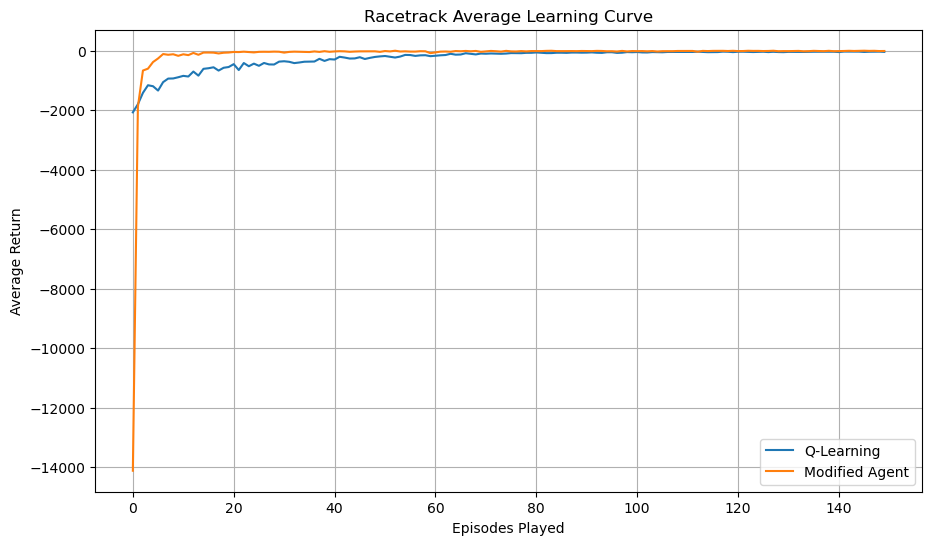

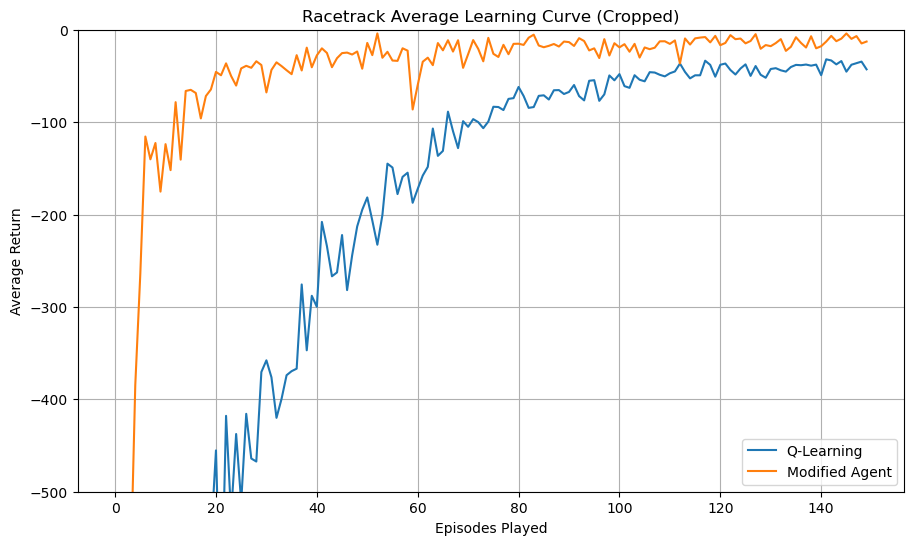

In [14]:
from racetrack_env import plot_modified_agent_results
from racetrack_env import simple_issue_checking

# Checking Modified Agent Results for Obvious Issues.
simple_issue_checking(modified_agent_rewards, modified_agent = True)

# Plotting Modified Agent Learning Curve.
%matplotlib inline
plot_modified_agent_results(modified_agent_rewards)

Based on your results, and your understanding of the algorithm and modifications that you have implemented, please answer the following discussion questions. <br />

**Question 1:** What modifications did you make to your agent?

**Question 2:** What effect(s) did you expect your modifications to have on the performance of your agent?

**Question 3:** Did your modifications have the effect(s) you expected? Why do you think that this was the case?

**Question 4:** If you had more time, what would you do to further improve the performance of your agent?

Please do not exceed **60 words** for any of your answers.

Please note that **your implementation and discussion will be assessed jointly**. This means that, in order to score highly, you will need to correctly implement appropriate modifications to your agent **AND** discuss them well.

Please write your answers for Exercise 2b in this markdown cell.

**Answer 1:**
I implemented Dyna-Q architecture into a traditional Q-learning framework, allowing the agent to benefit from both direct environmental interactions and simulated planning updates generated from a dynamically constructed model. This hybrid approach systematically merges real-time learning with retrospective analysis of past experiences, significantly enriching the agent’s strategy development across diverse states, while increasing its ability to adapt to new scenarios more effectively.

**Answer 2:**
I expected that the integration of Dyna-Q would substantially accelerate learning by utilizing simulated experiences for more frequent and comprehensive value updates. This strategy was expected to enhance the agent's efficiency in policy development,improve variance, enabling quicker convergence to optimal actions, thus dramatically reducing the learning curve and enhancing the agent’s ability to navigate complex decision spaces with greater speed.

**Answer 3:**
Yes, the enhancements led to the expected outcomes. The agent achieved faster learning rates as evidenced by steeper and smoother learning curves. This efficiency was primarily due to the Dyna-Q’s ability to perform multiple value updates per step, utilizing both direct and simulated experiences, which accelerated the value propagation throughout the state-space.

**Answer 4:**
1- SARSA(λ) for Multi-Step Learning: Employ SARSA(λ) to enhance adaptability and decision-making through the λ-return, updating past state-action pairs in complex environments.
2- Integrate Deep Reinforcement Learning: To tackle challenges beyond traditional RL, enhancing state representation and value approximation.

3-
Prioritized Sweeping: Us itg alongside SARSA(λ) to efficiently navigate and learn from dynamic environments, optimizing updates on crucial state-action pai.rs.